In [32]:
import yfinance as yf

# Specify the list of ticker symbols (replace with your own)
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]

# Download historical stock prices
stock_data = yf.download(tickers, start="1900-01-01", end="2023-11-01", progress=False)['Adj Close']

# Print the first few rows of the stock data
print(stock_data)


                  AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
1980-12-12    0.099319         NaN         NaN         NaN         NaN
1980-12-15    0.094137         NaN         NaN         NaN         NaN
1980-12-16    0.087228         NaN         NaN         NaN         NaN
1980-12-17    0.089387         NaN         NaN         NaN         NaN
1980-12-18    0.091978         NaN         NaN         NaN         NaN
...                ...         ...         ...         ...         ...
2023-10-25  170.874893  121.389999  125.610001  339.979980  212.419998
2023-10-26  166.670425  119.570000  122.279999  327.225861  205.759995
2023-10-27  167.998672  127.739998  122.169998  329.141968  207.300003
2023-10-30  170.065933  132.710007  124.459999  336.626770  197.360001
2023-10-31  170.545319  133.089996  124.080002  337.425140  200.839996

[10812 rows x 5 columns]


In [33]:
import pandas as pd
import numpy as np
import yfinance as yf  # You may need to install this library using: pip install yfinance

# List of ticker symbols
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]

# Function to fetch stock data and calculate log returns
import pandas as pd

# Assuming 'stock_data' is your DataFrame and 'tickers' is your list of tickers
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]

# Extract the columns for the specified tickers
selected_columns = [ticker for ticker in tickers]

# Create a DataFrame with the selected columns
selected_data = stock_data[selected_columns]

# Remove rows with NaN values
selected_data_cleaned = selected_data.dropna()

# Print or use the cleaned data
print(selected_data_cleaned)


                  AAPL       GOOGL        MSFT        AMZN        TSLA
Date                                                                  
2010-06-29    7.755361   11.367868   17.842958    5.430500    1.592667
2010-06-30    7.614889   11.134885   17.613335    5.463000    1.588667
2010-07-01    7.522553   10.998248   17.728148    5.548000    1.464000
2010-07-02    7.475932   10.924675   17.812357    5.457000    1.280000
2010-07-06    7.527093   10.912663   18.233362    5.503000    1.074000
...                ...         ...         ...         ...         ...
2023-10-25  170.874893  125.610001  339.979980  121.389999  212.419998
2023-10-26  166.670425  122.279999  327.225861  119.570000  205.759995
2023-10-27  167.998672  122.169998  329.141968  127.739998  207.300003
2023-10-30  170.065933  124.459999  336.626770  132.710007  197.360001
2023-10-31  170.545319  124.080002  337.425140  133.089996  200.839996

[3359 rows x 5 columns]


In [34]:
import yfinance as yf
import pandas as pd
import numpy as np

# List of stock tickers
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]

# Create an empty list to store stock data
stock_data_list = []

# Fetch stock data for each ticker
for ticker in tickers:
    stock = yf.Ticker(ticker)
    
    # Get historical stock data
    historical_data = stock.history(period="max")
    
    # Add a 'Ticker' column to the historical data
    historical_data['Ticker'] = ticker
    
    # Append the data to the list
    stock_data_list.append(historical_data)

# Concatenate the list of DataFrames into a single DataFrame
stock_data = pd.concat(stock_data_list, ignore_index=True)

# Reset the index to have a proper datetime index
stock_data.reset_index(inplace=True)

# Fetch sector information for each stock
sector_info = []
for ticker in tickers:
    stock = yf.Ticker(ticker)
    
    # Get info about the stock, including the industry sector
    info = stock.info
    
    # Extract relevant information (e.g., 'sector')
    sector_info.append({'Ticker': ticker, 'Sector': info.get('sector', 'N/A')})

# Create a DataFrame from the sector information
sector_df = pd.DataFrame(sector_info)

# Merge stock_data with sector_df based on the 'Ticker' column
merged_data = pd.merge(stock_data, sector_df, left_on='Ticker', right_on='Ticker')

# Print or use the merged data
print(merged_data)

       index        Open        High         Low       Close     Volume  \
0          0    0.099319    0.099750    0.099319    0.099319  469033600   
1          1    0.094569    0.094569    0.094137    0.094137  175884800   
2          2    0.087659    0.087659    0.087228    0.087228  105728000   
3          3    0.089387    0.089818    0.089387    0.089387   86441600   
4          4    0.091978    0.092410    0.091978    0.091978   73449600   
...      ...         ...         ...         ...         ...        ...   
35235  35235  234.039993  237.100006  231.020004  235.600006  116320100   
35236  35236  235.039993  243.619995  233.339996  241.199997  122288000   
35237  35237  242.039993  244.009995  231.399994  234.210007  117950600   
35238  35238  233.750000  238.750000  232.330002  235.449997   65125200   
35239  35239  236.889999  237.800003  232.100006  235.672806   61727689   

       Dividends  Stock Splits Ticker             Sector  
0            0.0           0.0   AAPL   

           Open      High       Low     Close    Volume
1     -0.049005 -0.053343 -0.053581 -0.053581 -0.980845
2     -0.075870 -0.075870 -0.076231 -0.076231 -0.508959
3      0.019512  0.024331  0.024450  0.024450 -0.201401
4      0.028580  0.028445  0.028580  0.028580 -0.162870
5      0.059239  0.058970  0.059239  0.059239 -0.412351
...         ...       ...       ...       ...       ...
35235  0.008755 -0.001222  0.019583  0.005533 -0.203226
35236  0.004264  0.027128  0.009992  0.023491  0.050033
35237  0.029347  0.001600 -0.008349 -0.029408 -0.036113
35238 -0.034851 -0.021792  0.004011  0.005280 -0.593954
35239  0.013344 -0.003987 -0.000990  0.000946 -0.053579

[35237 rows x 5 columns]
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool


/Users/maloyd1/miniforge3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


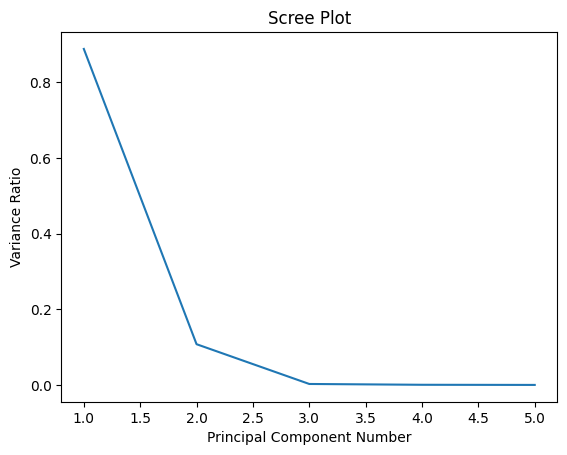

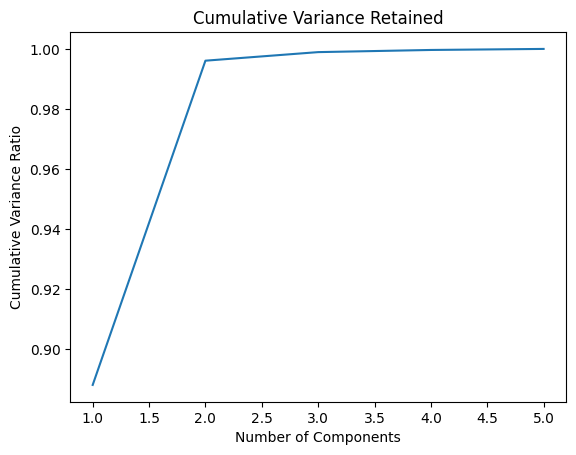

Number of components to capture at least 80% of variance: 1


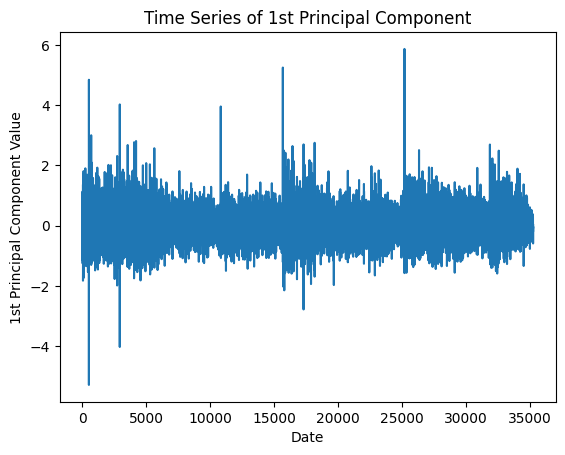

Lowest Date: 525
Lowest Value: -5.287613293834864
()


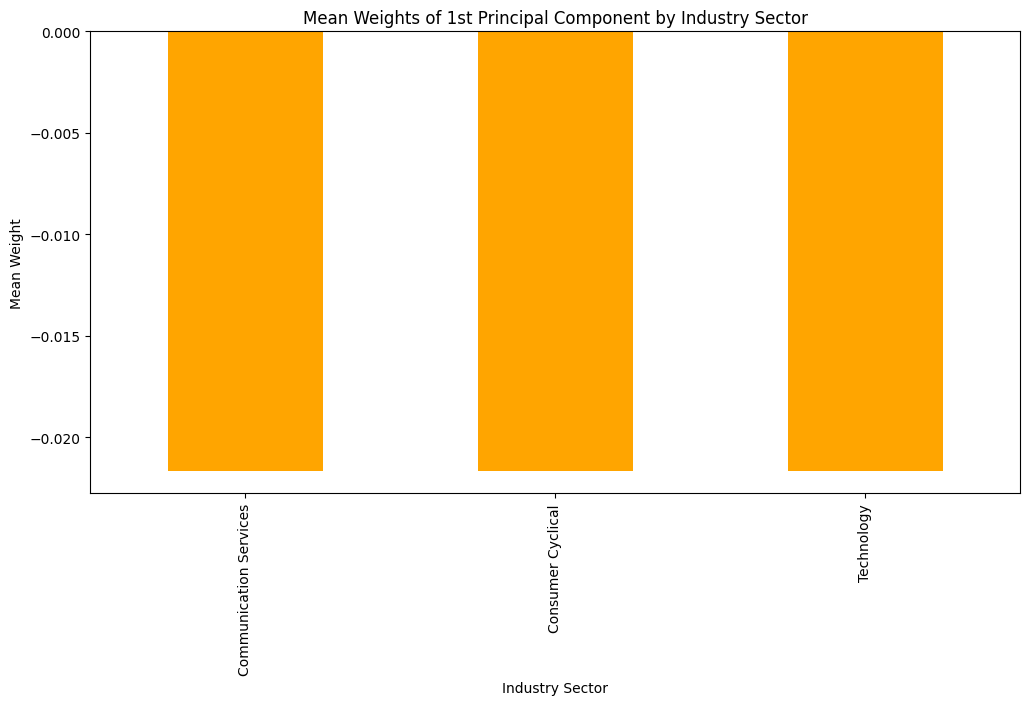

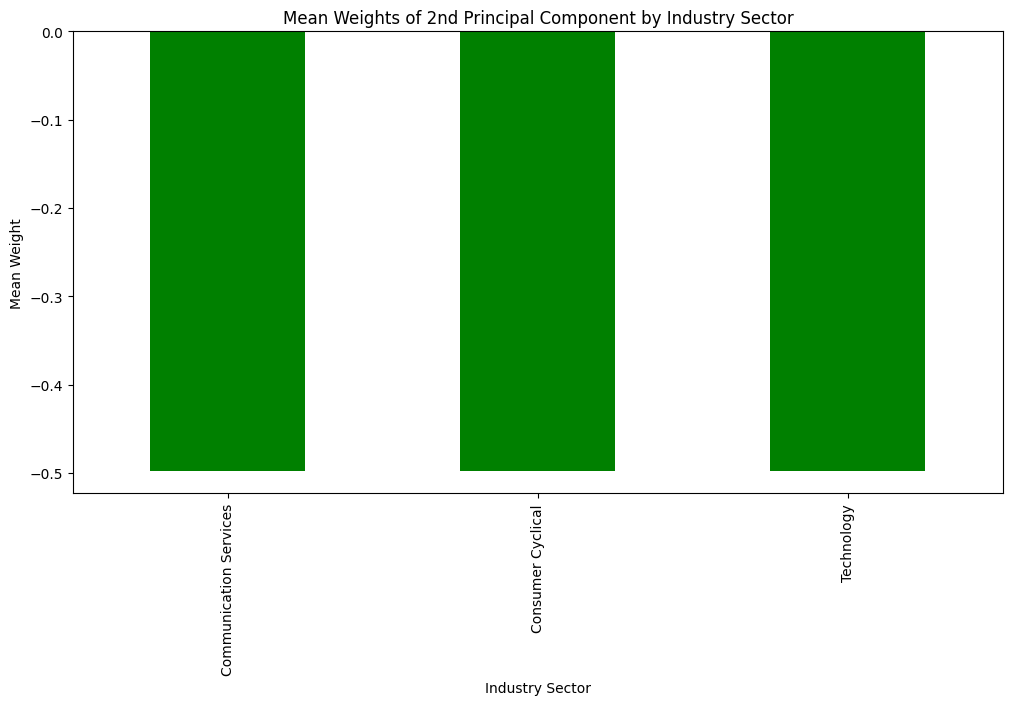

In [35]:
# Calculate log returns for each ticker
# Drop rows with missing values
merged_data.dropna(subset=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)



import numpy as np

# Calculate log returns
log_returns = np.log(merged_data[['Open', 'High', 'Low', 'Close', 'Volume']] / merged_data[['Open', 'High', 'Low', 'Close', 'Volume']].shift(1))

# Replace infinite values with NaN
log_returns.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
log_returns.dropna(inplace=True)



print(log_returns)
print(log_returns[['Open', 'High', 'Low', 'Close', 'Volume']].isin([np.inf, -np.inf]).any())

# Perform PCA analysis
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA()

# Fit PCA model to log returns
pca.fit(log_returns)

# Scree plot
import matplotlib.pyplot as plt

plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Variance Ratio')
plt.show()

# Cumulative Variance plot
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

# Identify components for 80% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
components_for_80_variance = np.argmax(cumulative_variance >= 0.8) + 1

print(f"Number of components to capture at least 80% of variance: {components_for_80_variance}")

# Time series plot of the 1st principal component
first_principal_component = pca.transform(log_returns)[:, 0]

plt.plot(log_returns.index, first_principal_component)
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('1st Principal Component Value')
plt.show()

# Find the index of the lowest value for the 1st principal component
lowest_index = np.argmin(first_principal_component)

# Get the date corresponding to the lowest value
lowest_date = log_returns.index[lowest_index]

# Get the lowest value itself
lowest_value = first_principal_component[lowest_index]

print(f"Lowest Date: {lowest_date}")
print(f"Lowest Value: {lowest_value}")


# Extract weights from the PCA model for 1st and 2nd principal components
weights_1st_component = pca.components_[0]
weights_2nd_component = pca.components_[1]

print(weights_1st_component[0].shape)

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already calculated weights_1st_component and weights_2nd_component from PCA

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already calculated weights_1st_component and weights_2nd_component from PCA

# Create a plot to show weights of the 1st principal component grouped by the industry sector
weights_1st_component_expanded = np.tile(weights_1st_component, (len(merged_data), 1))

# Create a DataFrame with the expanded weights and the 'Sector' column
weights_df_1st_component = pd.DataFrame({'Weight': weights_1st_component_expanded[:, 0], 'Sector': merged_data['Sector']})

# Calculate mean weights by sector
mean_weights_by_sector_1st = weights_df_1st_component.groupby('Sector')['Weight'].mean()

# Plot the mean weights
plt.figure(figsize=(12, 6))
mean_weights_by_sector_1st.plot(kind='bar', color='orange')
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

# Repeat the weights for each row in the DataFrame
weights_2nd_component_expanded = np.tile(weights_2nd_component, (len(merged_data), 1))

# Create a DataFrame with the expanded weights and the 'Sector' column for the 2nd principal component
weights_df_2nd_component = pd.DataFrame({'Weight': weights_2nd_component_expanded[:, 0], 'Sector': merged_data['Sector']})

# Calculate mean weights by sector for the 2nd principal component
mean_weights_by_sector_2nd = weights_df_2nd_component.groupby('Sector')['Weight'].mean()

# Plot the mean weights for the 2nd principal component
plt.figure(figsize=(12, 6))
mean_weights_by_sector_2nd.plot(kind='bar', color='green')
plt.title('Mean Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()
